In [32]:
# Importação de Bibliotecas
import pandas as pd #Manipulação de conjuntos de dados
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Análises gráficas
import io #Manipulação de entradas e saídas

from matplotlib.widgets import TextBox #Visualização de textos

In [25]:
df = pd.read_csv("dataset\Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


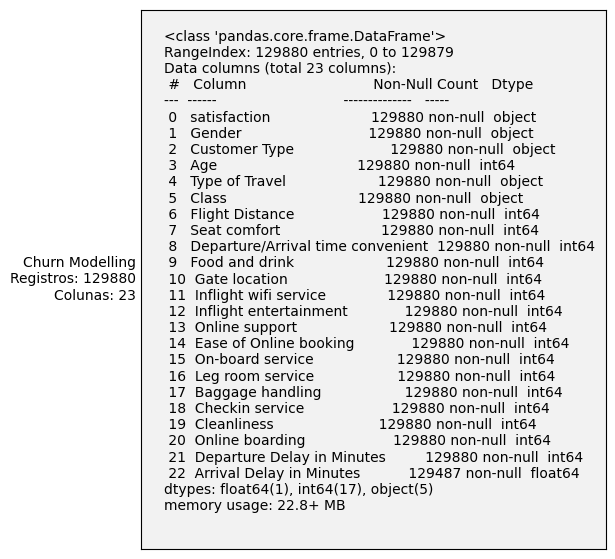

In [24]:
# @title Verificação das Informações do Conjunto de Dados

registros, colunas = df.shape

buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()

plt.figure(figsize=(6,7))
ax = plt.subplot()
texto=f'''
Churn Modelling
Registros: {registros}
Colunas: {colunas}
'''
textBox = TextBox(ax,label=texto,initial=s)

plt.show()

In [26]:
def nullAndDuplicates(df):
  nulos = df.isnull().sum()
  duplicados = df[df.duplicated()].sum()
  display(pd.DataFrame([nulos, duplicados])
          .T
          .rename(columns={0:"Nulos",1:"Duplicados"}))

nullAndDuplicates(df)

,Nulos,Duplicados
satisfaction,0.0,0.0
Gender,0.0,0.0
Customer Type,0.0,0.0
Age,0.0,0.0
Type of Travel,0.0,0.0
Class,0.0,0.0
Flight Distance,0.0,0.0
Seat comfort,0.0,0.0
Departure/Arrival time convenient,0.0,0.0
Food and drink,0.0,0.0


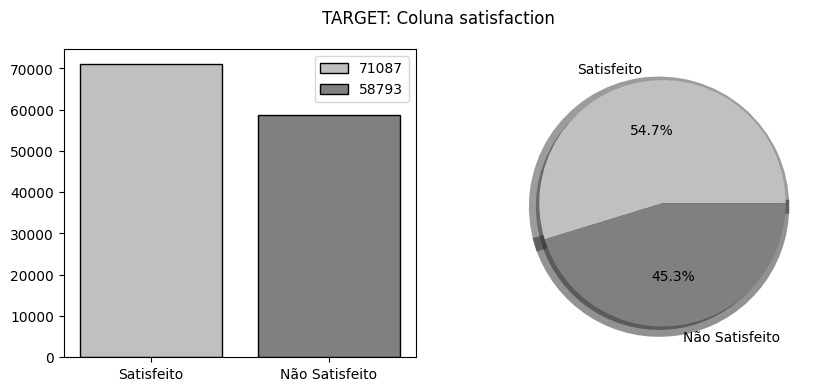

In [37]:
# @title Verificação de Balanceamento da Variável Alvo (TARGET)

count = df[['satisfaction']].value_counts().values

fig = plt.figure(figsize=(10,4))
fig.suptitle('TARGET: Coluna satisfaction')

plt.subplot(1,2,1)
plt.bar(["Satisfeito","Não Satisfeito"],
        count,
        color=['silver','gray'],
        label=count,
        edgecolor = "black")
plt.legend()

plt.subplot(1,2,2)
plt.pie(count,
        colors=['silver','gray'],
        labels=["Satisfeito","Não Satisfeito"],
        autopct="%1.1f%%",
        shadow=True,
        wedgeprops = {'linewidth': 10})

plt.show()

In [33]:
# @title Resumo das Variáveis Numéricas
display(df.describe(include=[np.number]))

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [34]:
# @title Resumo das Variáveis não Numéricas
display(df.describe(include=[object]).T)

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
